<a href="https://colab.research.google.com/github/Ashitha11/Langgraph/blob/main/Langgraph_basicsipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langgraph langsmith

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.4/151.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.9 MB/s eta 0:00:00


In [2]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.9 MB/s eta 0:00:00


In [3]:
!pip install python-dotenv

In [8]:
from dotenv import load_dotenv
import os

load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
GROQ_API_KEY = os.getenv("GROQ_API_KEY")
LANGSMITH_API_KEY = os.getenv("LANGSMITH_API_KEY")

In [10]:
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"] = LANGSMITH_API_KEY
os.environ["LANGCHAIN_PROJECT"] = "CourseLanggraph"

In [13]:
from langchain_groq import ChatGroq
llm = ChatGroq(groq_api_key=GROQ_API_KEY, model_name="gemma2-9b-it")        #llm model

In [14]:
#start building chatbot using langgraph

from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END                          # stategraph - extension of langchain to build workflows; START & END are nodes
from langgraph.graph.message import add_messages                            # add_messages = appends the new message to the messages list inside state.

In [15]:
class State(TypedDict):
  #add_messages appends messages to the list rather than overwriting
  messages:Annotated[list,add_messages]
  #here, add_messages is responsible to add messages to the variable 'messaages'

graph_builder = StateGraph(State)                                             #so here, the graph_builder does state management

In [17]:
graph_builder

In [18]:
def chatbot(state:State):
  return{"messages":llm.invoke(state['messages'])}

# here,its going to trigger add_messages and add it to messages varibale
# the chatbot function is inherting the state class; that has one variable 'messages' in the form of list and one function 'add_messages'


In [19]:
graph_builder.add_node("chatbot",chatbot)

In [20]:
#to create start and end node
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)                                         # graph flow is created
graph = graph_builder.compile()                                               #graph is now created

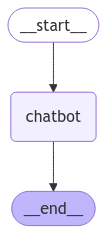

In [22]:
#to print the graph
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [27]:
while True:
  user_input = input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Goodbye :)")
    break
  for event in graph.stream({'messages':("user",user_input)}):                  #if quit or q is not given, it goes to graph.stream --> streams responses from an AI chatbot or LLM agent that processes the user's message.
    print(f'\n\nEVERYTHING PRESENT IN EVENT OBJECT \n\n',event.values())                                                       #everything present in event object
    for value in event.values():
      print(f'\n\nEVERYTHING PRESNT IN MESSAGES \n\n',value['messages'])                                                  #extracts chatbot history
      print(f'\n\nRESPONSE IN A USER-FRIENDLY WAY \n\n',"Assistant: ",value['messages'].content)                            #extracts chatbot's response in a user-friendly way

User: what is the use of langgraph in building multi AI agents


EVERYTHING PRESENT IN EVENT OBJECT 

 dict_values([{'messages': AIMessage(content="LangGraph, a powerful tool developed by Google DeepMind, plays a crucial role in building multi-AI agent systems by providing a shared, structured representation of language. \n\nHere's how it contributes:\n\n**1. Facilitating Communication and Collaboration:**\n\n* LangGraph acts as a common language for different AI agents. Each agent can express its intentions, observations, and requests using this shared language, enabling them to understand each other and collaborate effectively.\n* It allows agents to reason about and reason about the actions and states of other agents, fostering more sophisticated interactions and collective intelligence.\n\n**2. Building Complex Multi-Agent Systems:**\n\n* Its structured representation enables the development of complex multi-agent systems with interconnected goals and dependencies. Agents can lever